In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
# Step 1. Load dataset (pretend unlabeled)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 2. Preprocessing – scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Step 3. Select 2 features for simple visualization
X_2d = X_scaled[:, :2]

# Step 4. K-Means clustering
k = 3  # number of clusters (can also try elbow method to find optimal k)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_2d)

# Step 5. Evaluate clusters using Silhouette Score
score = silhouette_score(X_2d, clusters)
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.436


C:\Users\Freef\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


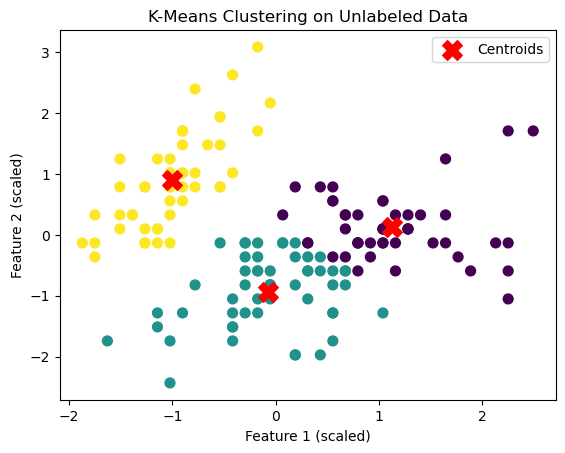

In [10]:
# Step 6. Visualization
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', marker='X', s=200, label='Centroids')
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("K-Means Clustering on Unlabeled Data")
plt.legend()
plt.show()